# Simple NN

## Imports

In [2]:
import torch
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


random.seed(42)
np.random.seed(42)

## Math

### list comprehension

In [ ]:
list_of_squares = [
   i ** 2 for i in range(0, 20, 2) if i % 3 == 0
]

In [ ]:
list_of_squares

[0, 36, 144, 324]

In [ ]:
list_of_squares = []

for i in range(0, 20, 2):
  list_of_squares.append(i ** 2)

In [ ]:
list_of_squares

[0, 4, 16, 36, 64, 100, 144, 196, 256, 324]

### dict comprehenstion

In [ ]:
dict_of_squares = {
  i : i**2 for i in range(0, 20, 2)
}
dict_of_squares

{0: 0, 2: 4, 4: 16, 6: 36, 8: 64, 10: 100, 12: 144, 14: 196, 16: 256, 18: 324}

In [ ]:
dict_of_squares = {}

for i in range(0, 20, 2):
  dict_of_squares[i] = i ** 2

In [ ]:
dict_of_squares

{0: 0, 2: 4, 4: 16, 6: 36, 8: 64, 10: 100, 12: 144, 14: 196, 16: 256, 18: 324}

### continue

In [ ]:
x = [i for i in range(20)]
y_1 = [
    2*i + np.random.randint(-4,4) for i in range(20)
    ]
y_2 = [2*i for i in range(20)]

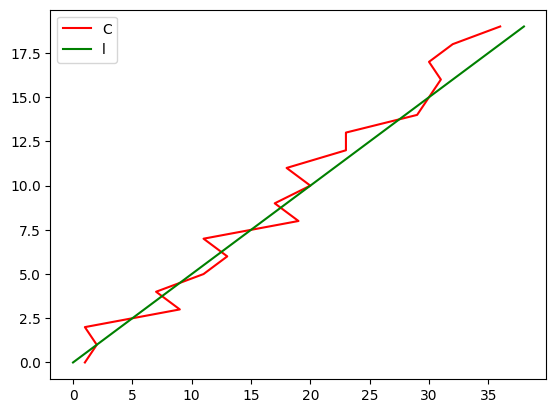

In [ ]:
x = [i for i in range(20)]
y_1 = [
    2*i + np.random.randint(-4,4) for i in range(20)
    ]
y_2 = [2*i for i in range(20)]
plt.plot(y_1, x, c='r')
plt.legend('Noise')
plt.plot(y_2, x, c='g')
plt.legend('Clean')

### Class

In [ ]:
type('')

str

In [ ]:
'sd'.replace("d", "t")

'st'

In [ ]:
2.replace(2, 1)

SyntaxError: invalid decimal literal (<ipython-input-49-b26156b191c5>, line 1)

In [ ]:
class Cars():
  """This is class for car.

  Attributes
  ----------
  speed : int
    this is the spped of car
  capacity : int
    how many people can be fit
  """
  def __init__(self, speed, capacity):
    self.speed = speed
    self.capacity = capacity


  def see_capacity(self):
    print(self.capacity)

  def see_speed(self):
    print(self.speed)

In [ ]:
class Fast_Cars(Cars):
    """This is subclass for fast cars
    """
    def __init__(self, speed, capacity, max_speed):
      self.speed = speed
      self.capacity = capacity
      self.max_speed = max_speed

    def see_max_speed(self):
      print(self.max_speed)

In [ ]:
bmw = Cars(speed=200, capacity=4)

In [ ]:
bmw.see_capacity()

4


In [ ]:
bmw.see_max_speed()

AttributeError: 'Cars' object has no attribute 'see_max_speed'

In [ ]:
audi = Fast_Cars(speed=200, capacity=4, max_speed=400)

In [ ]:
audi.see_max_speed()

400


In [ ]:
audi.see_capacity()

4


### continue

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

$ y = kx $



https://media.geeksforgeeks.org/wp-content/cdn-uploads/20230602113310/Neural-Networks-Architecture.png 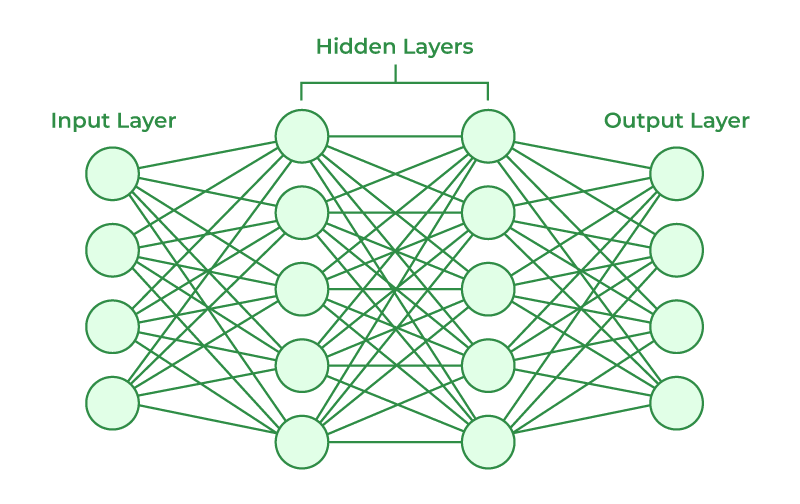

In [4]:
class simple_net(nn.Module):
    """simple NN for 1d Task
    """
    def __init__(self):
        super(simple_net, self).__init__()
        # an linear operator: y = Wx
        self.fc1 = nn.Linear(20, 20, bias=True)
        self.fc2 = nn.Linear(20,40, bias=True)
        self.fc3 = nn.Linear(40,20, bias=True)

    def forward(self, x):
        output = self.fc1(x)
        output = self.fc2(output)
        y = self.fc3(output)
        return y

In [5]:
net = simple_net()

In [6]:
print(net)

simple_net(
  (fc1): Linear(in_features=20, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=40, bias=True)
  (fc3): Linear(in_features=40, out_features=20, bias=True)
)


In [9]:
parameters = list(net.parameters())
# print(parameters)

In [12]:
from torch.optim import SGD, AdamW

$ y = Wx $

$|| y - Wx || -> min_{W} $

Optimizer: $ W_{t+1} = W_{t} - lr * \nabla W $

In [13]:
optimizer = AdamW(net.parameters(), lr=0.01)

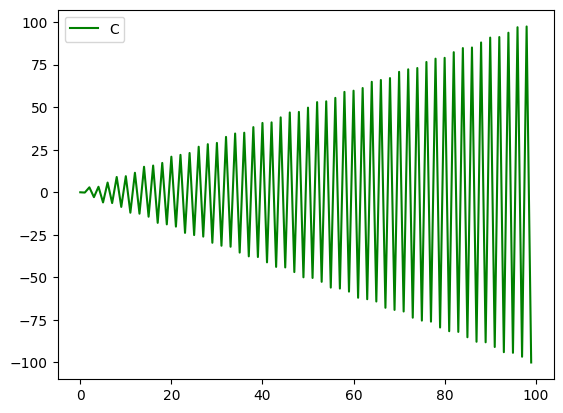

In [14]:
random.seed(42)
np.random.seed(42)
x = [i for i in range(100)]
y_true = [
    float(np.sin(i) + i) if i % 2==0  else float(np.sin(i) - i) for i in range(100)
    ]
plt.plot(x, y_true, c='g')
plt.legend('Clean')

In [15]:
x_test = torch.tensor([float(i) for i in range(20, 40)])
input_test = net(x_test)

In [16]:
x_test, input_test

(tensor([20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33.,
         34., 35., 36., 37., 38., 39.]),
 tensor([  0.5385,  -4.6673,  -6.4478,   6.5881,  -3.1099,  -0.1375,   3.4788,
           5.8354,   0.1558,   0.8658,  -0.4806,   0.6192, -10.3612,  -0.4982,
          -0.7916,   2.1895,  -0.7501,   0.2394,  -1.1563,  -1.5644],
        grad_fn=<ViewBackward0>))

In [17]:
for x_, y_pred in zip(x_test, input_test):
  print("INPUT: ", x_.item()," OUTPUT: ", y_pred.item())

INPUT:  20.0  OUTPUT:  0.5385432839393616
INPUT:  21.0  OUTPUT:  -4.667270183563232
INPUT:  22.0  OUTPUT:  -6.447835922241211
INPUT:  23.0  OUTPUT:  6.588130474090576
INPUT:  24.0  OUTPUT:  -3.1099281311035156
INPUT:  25.0  OUTPUT:  -0.13748356699943542
INPUT:  26.0  OUTPUT:  3.478808879852295
INPUT:  27.0  OUTPUT:  5.835447788238525
INPUT:  28.0  OUTPUT:  0.1558462530374527
INPUT:  29.0  OUTPUT:  0.8658299446105957
INPUT:  30.0  OUTPUT:  -0.48057520389556885
INPUT:  31.0  OUTPUT:  0.6191545724868774
INPUT:  32.0  OUTPUT:  -10.36117172241211
INPUT:  33.0  OUTPUT:  -0.49818965792655945
INPUT:  34.0  OUTPUT:  -0.7915533781051636
INPUT:  35.0  OUTPUT:  2.1895339488983154
INPUT:  36.0  OUTPUT:  -0.7501152753829956
INPUT:  37.0  OUTPUT:  0.23939400911331177
INPUT:  38.0  OUTPUT:  -1.1562832593917847
INPUT:  39.0  OUTPUT:  -1.5644035339355469


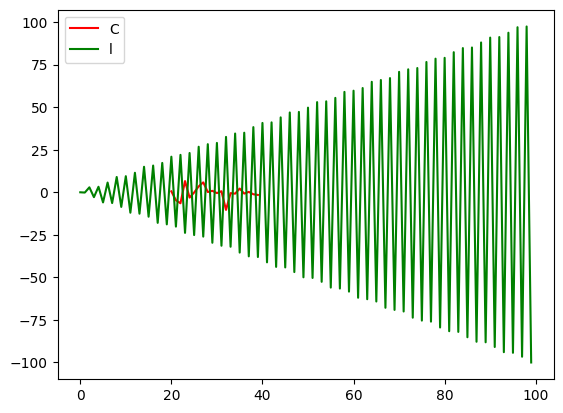

In [32]:
plt.plot(x_test.tolist(), input_test.tolist(), c='r')
plt.legend('Predicts')
plt.plot(x, y_true, c='g')
plt.legend('Clean')

In [26]:
lst=[i for i in range(1,20)]

In [29]:
lst[2:8]

[3, 4, 5, 6, 7, 8]

In [24]:
input.shape

torch.Size([100])

In [21]:
input = torch.tensor(x,dtype=torch.float32)
target = torch.tensor(y_true)
criterion = nn.MSELoss()

In [22]:
input.dtype, target.dtype

(torch.float32, torch.float32)

In [23]:
from tqdm.notebook import tqdm
# optimizer = SGD(net.parameters(), lr=1e-4)

In [30]:
losses = []
y_at_epoch = []
epochs = 30

for epoch in tqdm(range(epochs)):
  for batch in range(0,100,20):
    input_batch=input[batch:batch+20]
    target_batch=target[batch:batch+20]
    # 1) зануляем градиенты
    # 2) получаем выходы с нашей сети (forward pass)
    # 3) считаем loss functions
    # 4) считаем градиенты
    # 5) делаем шаг
    # 6? необязательно Добавляем лосс в список
    optimizer.zero_grad()
    # print(list(net.parameters()))
    y_pred = net(input_batch) # forward pass net(x) -> y_pred
    loss = criterion(y_pred, target_batch)

    # y_at_epoch.append(y_pred)

    # print(loss.item())  # Use .item() to convert the tensor to a Python scalar

    loss.backward()  # gradient calculation
    optimizer.step() # step of optim
    losses.append(loss.item())

  0%|          | 0/30 [00:00<?, ?it/s]

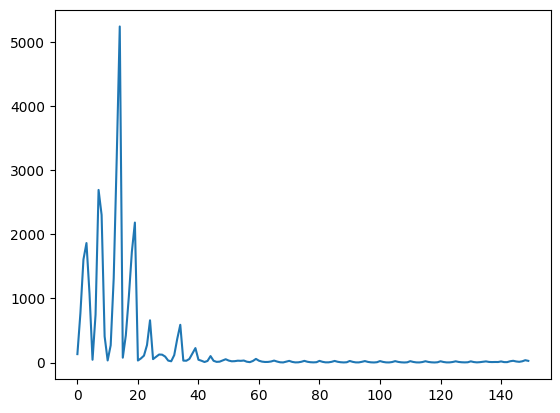

In [31]:
plt.plot(losses)

In [34]:
net(input[20:40])

tensor([ 24.3267, -25.4188,  25.4507, -26.3847,  26.7719, -27.3494,  27.3012,
        -28.6402,  29.3733, -30.4051,  30.3209, -31.3502,  31.7232, -32.3180,
         33.6075, -34.6219,  33.9563, -33.8875,  35.2298, -34.7178],
       grad_fn=<ViewBackward0>)

In [35]:
input[20:40]

tensor([20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33.,
        34., 35., 36., 37., 38., 39.])

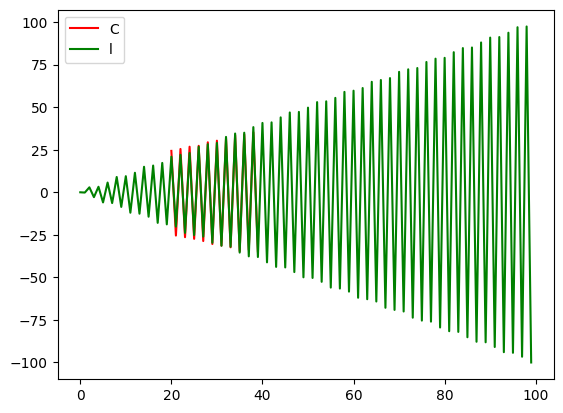

In [36]:
plt.plot(input[20:40].tolist(), net(input[20:40]).tolist(), c='r')
plt.legend('Predicts')
plt.plot(x, y_true, c='g')
plt.legend('Clean')

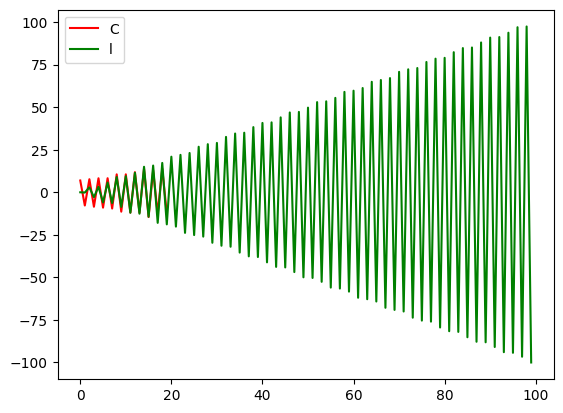

In [37]:
plt.plot(input[0:20].tolist(), net(input[0:20]).tolist(), c='r')
plt.legend('Predicts')
plt.plot(x, y_true, c='g')
plt.legend('Clean')

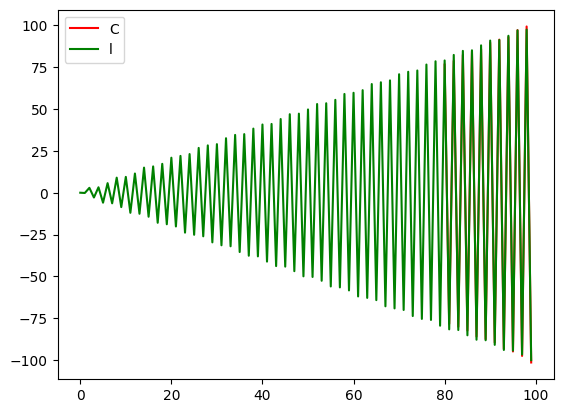

In [38]:
plt.plot(input[80:100].tolist(), net(input[80:100]).tolist(), c='r')
plt.legend('Predicts')
plt.plot(x, y_true, c='g')
plt.legend('Clean')